# How popular is my name?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
import requests
from pathlib import Path

def fetch_and_cache(data_url, file, data_dir="data", force=False):
    """
    Download and cache a url and return the file object.
    
    data_url: the web address to download
    file: the file in which to save the results.
    data_dir: (default="data") the location to save the data
    force: if true the file is always re-downloaded 
    
    return: The pathlib.Path to the file.
    """
    data_dir = Path(data_dir)
    data_dir.mkdir(exist_ok=True)
    file_path = data_dir/Path(file)
    if force and file_path.exists():
        file_path.unlink()
    if force or not file_path.exists():
        print('Downloading...', end=' ')
        resp = requests.get(data_url)
        with file_path.open('wb') as f:
            f.write(resp.content)
        print('Done!')
    else:
        import time 
        created = time.ctime(file_path.stat().st_ctime)
        print("Using cached version downloaded at", created)
    return file_path

In [3]:
data_url = 'https://www.ssa.gov/oact/babynames/state/namesbystate.zip'
namesbystate_path = fetch_and_cache(data_url, 'namesbystate.zip')

Downloading... Done!


In [4]:
import zipfile
zf = zipfile.ZipFile(namesbystate_path, 'r')

column_labels = ['State', 'Sex', 'Year', 'Name', 'Count']

...

Ellipsis

In [5]:
import zipfile
zf = zipfile.ZipFile(namesbystate_path, 'r')

column_labels = ['State', 'Sex', 'Year', 'Name', 'Count']

def load_dataframe_from_zip(zf, f):
    with zf.open(f) as fh: 
        return pd.read_csv(fh, header=None, names=column_labels)

states = [
    load_dataframe_from_zip(zf, f)
    for f in sorted(zf.filelist, key=lambda x:x.filename) 
    if f.filename.endswith('.TXT')
]

baby_names = states[0]
for state_df in states[1:]:
    baby_names = pd.concat([baby_names, state_df])
baby_names = baby_names.reset_index().iloc[:, 1:]

In [6]:
baby_names.head()

,State,Sex,Year,Name,Count
0,AK,F,1910,Mary,14
1,AK,F,1910,Annie,12
2,AK,F,1910,Anna,10
3,AK,F,1910,Margaret,8
4,AK,F,1910,Helen,7


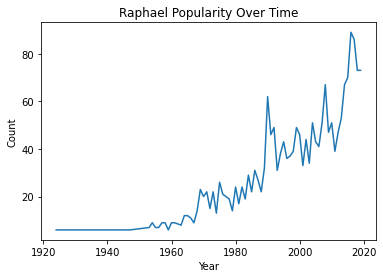

In [8]:
raphael_baby_name = baby_names[(baby_names['Name'] == 'Raphael') & (baby_names['State'] == 'CA')& (baby_names['Sex'] == 'M') ]
plt.plot(raphael_baby_name['Year'], raphael_baby_name['Count'])
plt.title("Raphael Popularity Over Time")
plt.xlabel('Year')
plt.ylabel('Count');